In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [2]:
file_path='SNDR.SNPP.CRIMSS.20120401.M01.L3_CLIMCAPS_QCC_NSR.std.v02_38.G.210330142559.nc'

In [3]:
# Open the HDF or NetCDF file
data = xr.open_dataset(file_path,engine='netcdf4')  # or 'netcdf4' if NetCDF


In [4]:
data

<xarray.Dataset> Size: 182MB
Dimensions:              (air_pres: 100, air_pres_h2o: 66, orbit_pass: 2,
                          lat: 180, lon: 360, surf_wnum_ir: 4, cld_pres_lay: 3,
                          bnds_1d: 2, utc_tuple: 8)
Coordinates:
  * air_pres             (air_pres) float32 400B 1.606 3.838 ... 1.1e+05
  * air_pres_h2o         (air_pres_h2o) float32 264B 5.153e+03 ... 1.1e+05
    obs_time_tai93       (orbit_pass) datetime64[ns] 16B ...
  * lon                  (lon) float32 1kB -179.5 -178.5 -177.5 ... 178.5 179.5
  * lat                  (lat) float32 720B -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
  * cld_pres_lay         (cld_pres_lay) float32 12B 6.633e+03 5.47e+04 8.649e+04
    cld_pres_lay_lbl     (cld_pres_lay) <U4 48B ...
  * surf_wnum_ir         (surf_wnum_ir) float32 16B 832.0 961.0 ... 2.508e+03
  * orbit_pass           (orbit_pass) timedelta64[ns] 16B 13:30:00 01:30:00
    utc_tuple_lbl        (utc_tuple) <U11 352B ...
Dimensions without coordinates: bnds_1d, utc_tuple
Data variables: (12/23)
    air_temp             (orbit_pass, air_pres, lat, lon) float32 52MB ...
    surf_air_temp        (orbit_pass, lat, lon) float32 518kB ...
    surf_temp            (orbit_pass, lat, lon) float32 518kB ...
    h2o_vap_tot          (orbit_pass, lat, lon) float32 518kB ...
    spec_hum             (orbit_pass, air_pres_h2o, lat, lon) float32 34MB ...
    rel_hum              (orbit_pass, air_pres_h2o, lat, lon) float32 34MB ...
    ...                   ...
    prior_surf_pres      (orbit_pass, lat, lon) float32 518kB ...
    obs_time_tai93_bnds  (orbit_pass, bnds_1d) datetime64[ns] 32B ...
    obs_time_utc         (orbit_pass, utc_tuple) float32 64B ...
    lon_bnds             (lon, bnds_1d) float32 3kB ...
    lat_bnds             (lat, bnds_1d) float32 1kB ...
    cld_pres_lay_bnds    (cld_pres_lay, bnds_1d) float32 24B ...
Attributes: (12/70)
    keywords:                          ATMOSPHERE > ATMOSPHERIC TEMPERATURE >...
    Conventions:                       CF-1.6, ACDD-1.3
    source:                            CrIS and ATMS instrument telemetry
    comment:                           
    acknowledgment:                    Support for this research was provided...
    standard_name_vocabulary:          CF Standard Name Table v28
    ...                                ...
    input_file_types:                  CRIMSS_L3; CRIMSS_L3; CRIMSS_L3; CRIMS...
    input_file_dates:                  2012-04-19; 2012-04-20; 2012-04-21; 20...
    AutomaticQualityFlag:              Passed
    qa_no_data:                        FALSE
    shortname:                         SNDRSNIML3CMCCPN
    metadata_link:                     http://disc.sci.gsfc.nasa.gov/

In [5]:
data['air_temp']

<xarray.DataArray 'air_temp' (orbit_pass: 2, air_pres: 100, lat: 180, lon: 360)> Size: 52MB
[12960000 values with dtype=float32]
Coordinates:
  * air_pres        (air_pres) float32 400B 1.606 3.838 ... 1.071e+05 1.1e+05
    obs_time_tai93  (orbit_pass) datetime64[ns] 16B ...
  * lon             (lon) float32 1kB -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * lat             (lat) float32 720B -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
  * orbit_pass      (orbit_pass) timedelta64[ns] 16B 13:30:00 01:30:00
Attributes:
    units:                  Kelvin
    ancillary_variables:    air_temp_nobs air_temp_sdev
    valid_range:            [100. 400.]
    long_name:              air temperature profile
    standard_name:          air_temperature
    description:            air temperature profile on 100 levels
    AIRS_HDF_name:          TAirSup
    cell_methods:           area: mean
    coverage_content_type:  physicalMeasurement

In [6]:
data['orbit_pass']

<xarray.DataArray 'orbit_pass' (orbit_pass: 2)> Size: 16B
array([48600000000000,  5400000000000], dtype='timedelta64[ns]')
Coordinates:
    obs_time_tai93  (orbit_pass) datetime64[ns] 16B ...
  * orbit_pass      (orbit_pass) timedelta64[ns] 16B 13:30:00 01:30:00
Attributes:
    valid_range:            [ 0. 24.]
    long_name:              Equatorial crossing time
    description:            Nominal solar time when the spacecraft passes ove...
    coverage_content_type:  coordinate

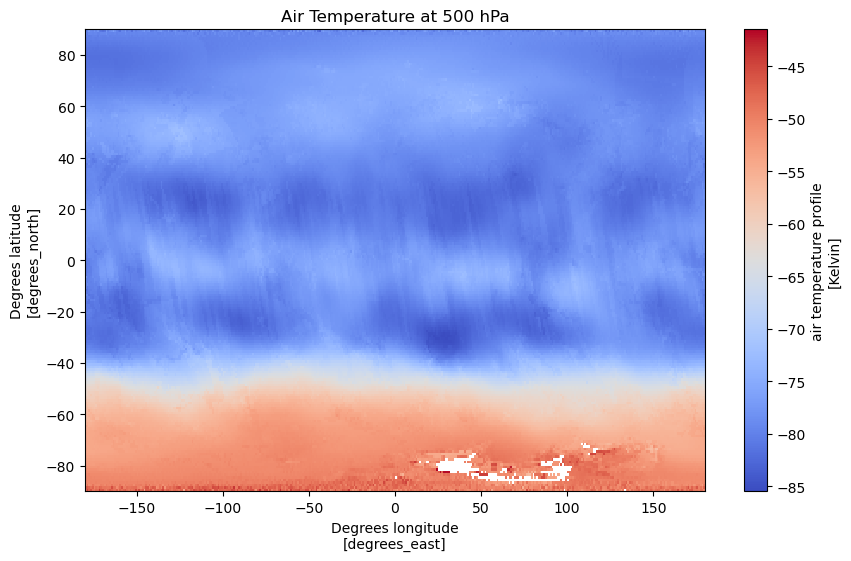

In [7]:
# Select a specific pressure level and orbit pass
# For example, air_pres=500 (assuming 500 hPa) and orbit_pass=0
air_temp_slice = data['air_temp'].sel(
    air_pres=1.606383e+00, 
    orbit_pass=np.timedelta64(48600000000000, 'ns'), 
    method='nearest')

# Convert temprature from Kelvin to Celsius
air_temp_slice -= 273.15

# Plot the data
plt.figure(figsize=(10, 6))
air_temp_slice.plot(cmap='coolwarm')
plt.title("Air Temperature at 500 hPa")
plt.show()


In [8]:
data['lat']

<xarray.DataArray 'lat' (lat: 180)> Size: 720B
array([-89.5, -88.5, -87.5, -86.5, -85.5, -84.5, -83.5, -82.5, -81.5, -80.5,
       -79.5, -78.5, -77.5, -76.5, -75.5, -74.5, -73.5, -72.5, -71.5, -70.5,
       -69.5, -68.5, -67.5, -66.5, -65.5, -64.5, -63.5, -62.5, -61.5, -60.5,
       -59.5, -58.5, -57.5, -56.5, -55.5, -54.5, -53.5, -52.5, -51.5, -50.5,
       -49.5, -48.5, -47.5, -46.5, -45.5, -44.5, -43.5, -42.5, -41.5, -40.5,
       -39.5, -38.5, -37.5, -36.5, -35.5, -34.5, -33.5, -32.5, -31.5, -30.5,
       -29.5, -28.5, -27.5, -26.5, -25.5, -24.5, -23.5, -22.5, -21.5, -20.5,
       -19.5, -18.5, -17.5, -16.5, -15.5, -14.5, -13.5, -12.5, -11.5, -10.5,
        -9.5,  -8.5,  -7.5,  -6.5,  -5.5,  -4.5,  -3.5,  -2.5,  -1.5,  -0.5,
         0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,   9.5,
        10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,  18.5,  19.5,
        20.5,  21.5,  22.5,  23.5,  24.5,  25.5,  26.5,  27.5,  28.5,  29.5,
        30.5,  31.5,  32.5,  33.5,  34.5,  35.5,  36.5,  37.5,  38.5,  39.5,
        40.5,  41.5,  42.5,  43.5,  44.5,  45.5,  46.5,  47.5,  48.5,  49.5,
        50.5,  51.5,  52.5,  53.5,  54.5,  55.5,  56.5,  57.5,  58.5,  59.5,
        60.5,  61.5,  62.5,  63.5,  64.5,  65.5,  66.5,  67.5,  68.5,  69.5,
        70.5,  71.5,  72.5,  73.5,  74.5,  75.5,  76.5,  77.5,  78.5,  79.5,
        80.5,  81.5,  82.5,  83.5,  84.5,  85.5,  86.5,  87.5,  88.5,  89.5],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 720B -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
Attributes:
    units:                  degrees_north
    valid_range:            [-90.  90.]
    long_name:              Degrees latitude
    standard_name:          latitude
    axis:                   Y
    description:            Degrees latitude
    AIRS_HDF_name:          YDim
    coverage_content_type:  coordinate
    bounds:                 lat_bnds

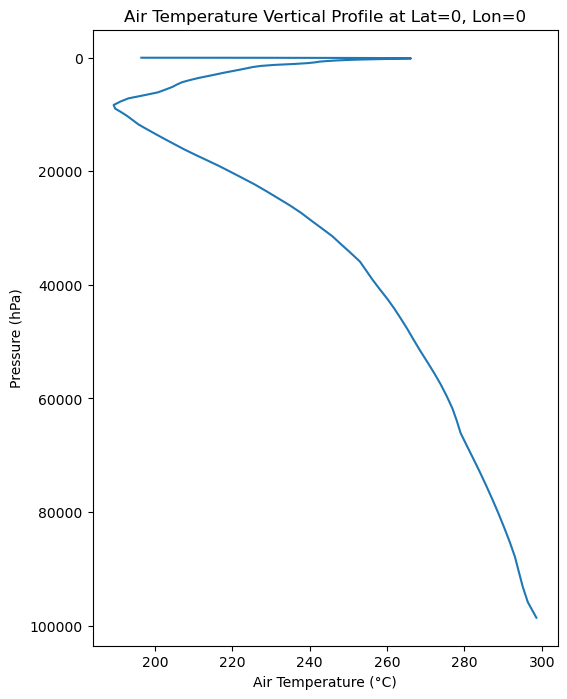

In [9]:
# Select a specific latitude and longitude
# For example, lat=0 (Equator) and lon=0 (Prime Meridian)
air_temp_profile = data['air_temp'].sel(
    lat=0, 
    lon=0, 
    orbit_pass=np.timedelta64(48600000000000, 'ns'), 
    method='nearest')

# Plot the vertical profile
plt.figure(figsize=(6, 8))
air_temp_profile.plot(y='air_pres')
plt.gca().invert_yaxis()  # Invert y-axis so higher pressures are at the bottom
plt.title("Air Temperature Vertical Profile at Lat=0, Lon=0")
plt.xlabel("Air Temperature (°C)")
plt.ylabel("Pressure (hPa)")
plt.show()


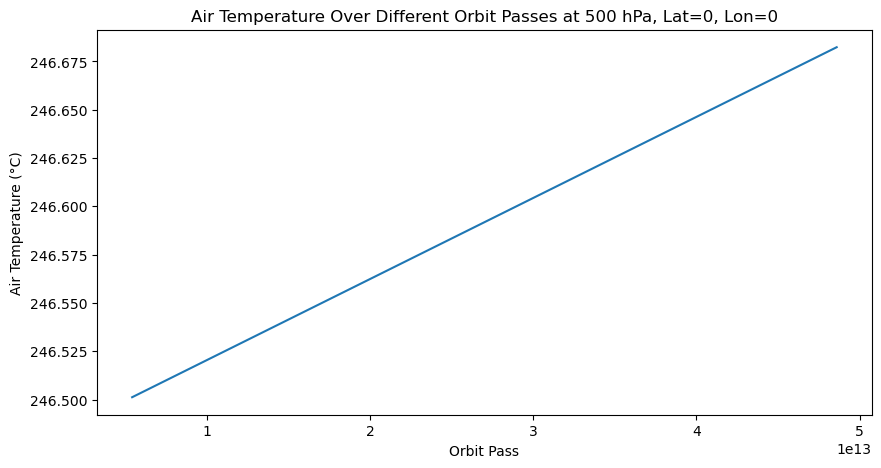

In [10]:
# Select a specific location and pressure level
# For example, lat=0, lon=0, and air_pres=500
air_temp_time_series = data['air_temp'].sel(
    lat=0, 
    lon=0, 
    air_pres=500,
    method='nearest')

# Plot the time series
plt.figure(figsize=(10, 5))
air_temp_time_series.plot()
plt.title("Air Temperature Over Different Orbit Passes at 500 hPa, Lat=0, Lon=0")
plt.xlabel("Orbit Pass")
plt.ylabel("Air Temperature (°C)")
plt.show()


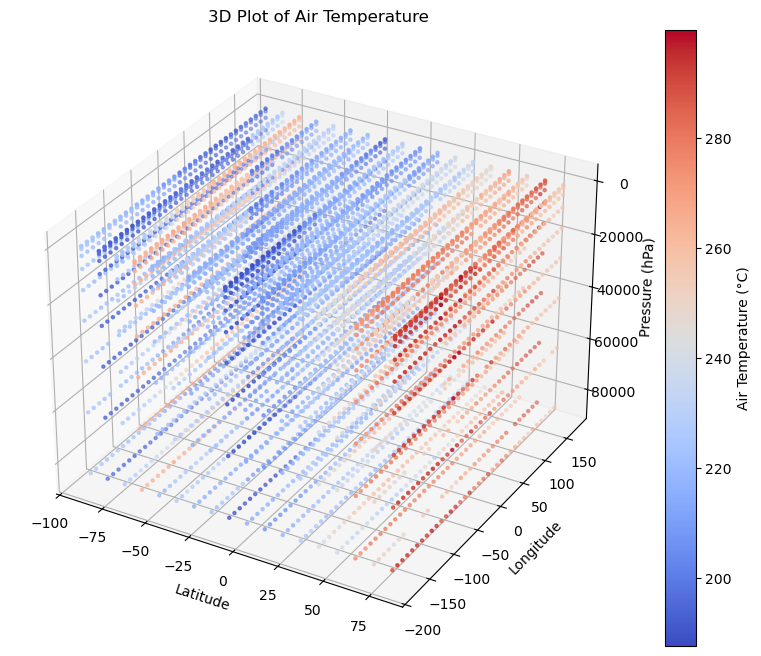

In [11]:


# Selecting a specific orbit pass (e.g., orbit_pass=0) for simplicity
# Sampling data to make the plot manageable by selecting every 10th lat/lon point
air_temp_sample = data['air_temp'].sel(orbit_pass=np.timedelta64(48600000000000, 'ns')
                                       )[::10, ::10, ::10]

# Extract latitude, longitude, pressure, and air_temp values for plotting
latitudes = air_temp_sample['lat'].values
longitudes = air_temp_sample['lon'].values
pressures = air_temp_sample['air_pres'].values
air_temperatures = air_temp_sample.values.flatten()

# Create meshgrid for lat, lon, and air_pres values
lat_mesh, lon_mesh, pres_mesh = np.meshgrid(latitudes, longitudes, pressures, indexing='ij')

# Flatten the meshgrid arrays for scatter plotting
lat_vals = lat_mesh.flatten()
lon_vals = lon_mesh.flatten()
pres_vals = pres_mesh.flatten()

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot the data points
sc = ax.scatter(lat_vals, lon_vals, pres_vals, c=air_temperatures, cmap='coolwarm', s=5)
plt.colorbar(sc, ax=ax, label="Air Temperature (°C)")

# Set labels and title
ax.set_xlabel("Latitude")
ax.set_ylabel("Longitude")
ax.set_zlabel("Pressure (hPa)")
ax.set_title("3D Plot of Air Temperature")

# Invert the z-axis so that lower pressures are at the top
ax.invert_zaxis()

plt.show()
